In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df_1 = pd.read_excel('../Data/Self assessment and Test Center.xlsx', engine='openpyxl')
df_2 = pd.read_excel('../Data/TS2018-2019_AISS.xlsx', engine='openpyxl')
df_3 = pd.read_excel('../Data/Variables and questions.xlsx', engine='openpyxl')

In [3]:
print(df_1.info)
# print(df_2.head())
# print(df_3.head())

<bound method DataFrame.info of                                        Id  lft_jr lft_cat  g  JO_team  Finals  \
0    014419E9-9730-41DC-8813-337E83118E63      12   11_12  1        0       0   
1    0373C5A4-0433-421D-81F5-F3D2C4B51251       7   00_08  0        0       0   
2    04D241B6-F1BB-4C48-8457-9F9127AE918C       8   00_08  0        0       0   
3    0578E3BC-DA4B-4B57-8D6A-F071804FFF2E      11   11_12  0        0       0   
4    06441EB7-3B47-453A-A71B-614B576B7215       8   00_08  1        0       0   
..                                    ...     ...     ... ..      ...     ...   
273  F678B02A-F941-4D03-833F-276BBBCE7475      10   09_10  0        0       0   
274  F9C7E58D-CDDC-494C-8124-BD07B97F5217       9   09_10  0        0       0   
275  FC06A844-0A2F-4027-BB6B-5D92B35951AC      10   09_10  0        0       0   
276  FE4BA400-8125-45A9-967C-5910D20824D4      12   11_12  0        0       0   
277  FECB0630-8FEE-4F4F-82D3-6F748A5E707E      11   11_12  0        0       0

# Removing rows with missing values

In [4]:
# Remove rows with missing values
df_1 = df_1.dropna()

In [5]:
df_1.info

<bound method DataFrame.info of                                        Id  lft_jr lft_cat  g  JO_team  Finals  \
0    014419E9-9730-41DC-8813-337E83118E63      12   11_12  1        0       0   
1    0373C5A4-0433-421D-81F5-F3D2C4B51251       7   00_08  0        0       0   
2    04D241B6-F1BB-4C48-8457-9F9127AE918C       8   00_08  0        0       0   
5    06C4C149-D062-4F88-8BEE-6F432EDF5E3C       8   00_08  0        0       0   
6    082D4B57-1D1E-434C-A1CA-07A8A7B4BCD3      15  15plus  0        0       1   
..                                    ...     ...     ... ..      ...     ...   
273  F678B02A-F941-4D03-833F-276BBBCE7475      10   09_10  0        0       0   
274  F9C7E58D-CDDC-494C-8124-BD07B97F5217       9   09_10  0        0       0   
275  FC06A844-0A2F-4027-BB6B-5D92B35951AC      10   09_10  0        0       0   
276  FE4BA400-8125-45A9-967C-5910D20824D4      12   11_12  0        0       0   
277  FECB0630-8FEE-4F4F-82D3-6F748A5E707E      11   11_12  0        0       0

# Feature engineering : Making a new feature 'bmi' from weight and height

In [6]:
# Calculating BMI from weight and height
# Formula : ( weight (kg) / height (cm) / height (cm) )x 10,000
df_1['bmi'] = ((df_1['X109_08']/df_1['X109_07']/df_1['X109_07'])*10000).round(2)

# Some rows for both weight and height have the value 0
df_1.loc[df_1['X109_07'] == 0]
df_1.loc[df_1['X109_08'] == 0]

# That results in some rows in bmi having the values 0 or inf
df_1['bmi'].head(10)

# We remove rows with the value 'inf' or 0 from bmi
df_1 = df_1[df_1['bmi'] != float("inf")]
df_1 = df_1[df_1['bmi'] != 0]

In [7]:
# Getting rid of none necessary columns, which in our case are the nominal ones
numeric_columns = df_1.select_dtypes(include=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
df_1 = df_1[numeric_columns]
print(df_1.head())

   lft_jr  g  JO_team  Finals  X01_01  X01_02  X01_03  X01_04  X01_05  X01_06  \
0      12  1        0       0       5       5       5       5       5       5   
5       8  0        0       0       3       5       5       5       5       5   
6      15  0        0       1       2       4       4       5       5       5   
7      12  0        0       0       5       5       5       5       5       5   
9      10  0        0       0       4       5       4       5       5       4   

   ...  X108_03  X108_04  X108_05  X109_01  X109_02  X109_04  X109_06  \
0  ...        0       71        1        3        3        3        1   
5  ...        0       66        5        5        3        5        3   
6  ...        2      111        3        3        3        5        4   
7  ...        0       79        4        2        5        5        3   
9  ...        0       71        3        1        3        2        4   

   X109_07  X109_08    bmi  
0      162     49.0  18.67  
5      146     3

In [8]:
df_1.X108_04

0       71
5       66
6      111
7       79
9       71
      ... 
271     84
272     75
275     78
276     61
277      0
Name: X108_04, Length: 221, dtype: int64

# X108_04 (shooting power) tranformed to Likert scale

In [9]:
# Select the column to transform
column = df_1["X108_04"]

# Normalize the values in the column
min_value = column.min()
max_value = column.max()
normalized_column = (column - min_value) / (max_value - min_value)

# Transform the values to a Likert scale
likert_column = normalized_column * 5

# Round the values to the nearest integer
likert_column = np.round(likert_column)

# Replace the original column with the Likert scale column
df_1["X108_04"] = likert_column

In [10]:
df_1["X108_04"]

0      3.0
5      3.0
6      5.0
7      4.0
9      3.0
      ... 
271    4.0
272    3.0
275    4.0
276    3.0
277    0.0
Name: X108_04, Length: 221, dtype: float64

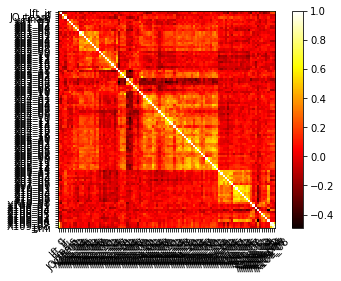

In [11]:
# Compute the correlation matrix
corr = df_1.corr()

# Plot the correlation matrix using a heatmap
plt.figure()
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df_1.columns)), df_1.columns, rotation=45)
plt.yticks(range(len(df_1.columns)), df_1.columns)
plt.show()

In [12]:
corr

,lft_jr,g,JO_team,Finals,X01_01,X01_02,X01_03,X01_04,X01_05,X01_06,...,X108_03,X108_04,X108_05,X109_01,X109_02,X109_04,X109_06,X109_07,X109_08,bmi
lft_jr,1.000000,0.299618,-0.092192,-0.011435,0.095883,0.025213,0.097132,-0.047637,-0.057727,0.082836,...,0.035562,0.231015,-0.137909,-0.015866,0.023790,0.010599,0.158685,0.787334,0.773498,0.561706
g,0.299618,1.000000,-0.080988,-0.090131,0.055086,0.049870,0.045880,0.043782,-0.044944,0.110374,...,-0.058059,0.046511,-0.137442,-0.073688,-0.230821,-0.187099,-0.108874,0.175030,0.209987,0.217549
JO_team,-0.092192,-0.080988,1.000000,0.371818,0.063657,0.056986,-0.008008,0.050373,0.062959,0.048915,...,0.022683,-0.161949,0.076818,0.006561,-0.011910,0.031370,0.029519,-0.060839,-0.047305,-0.057454
Finals,-0.011435,-0.090131,0.371818,1.000000,-0.072900,0.020781,0.021038,0.074869,-0.050224,0.131557,...,0.123960,-0.113624,0.096844,0.057641,0.014643,0.012140,0.136271,-0.034578,0.001765,0.029939
X01_01,0.095883,0.055086,0.063657,-0.072900,1.000000,0.169400,0.333641,0.117586,0.152128,0.054847,...,0.121135,-0.007363,-0.093354,0.005340,0.026794,-0.064255,0.077933,0.059730,0.059101,0.054555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X109_04,0.010599,-0.187099,0.031370,0.012140,-0.064255,-0.058824,-0.025174,0.129482,0.126730,-0.012844,...,0.006694,-0.081106,0.176324,0.278790,0.288199,1.000000,0.217532,0.020285,0.015637,-0.000345
X109_06,0.158685,-0.108874,0.029519,0.136271,0.077933,0.097074,0.113082,0.073915,0.036638,0.004930,...,0.275080,-0.492574,-0.016485,0.249858,0.380658,0.217532,1.000000,0.015513,0.024563,0.036463
X109_07,0.787334,0.175030,-0.060839,-0.034578,0.059730,0.022275,0.117804,-0.097431,-0.118841,0.059808,...,-0.101488,0.333873,-0.045450,0.047148,0.081663,0.020285,0.015513,1.000000,0.907915,0.523262
X109_08,0.773498,0.209987,-0.047305,0.001765,0.059101,-0.034125,0.094393,-0.075522,-0.106868,0.050376,...,-0.095943,0.305061,-0.094830,0.051312,0.090796,0.015637,0.024563,0.907915,1.000000,0.823798


# Standardize the Data
PCA is affected by the scale, so we have to scale the features using. StandardScaler whcih will help us standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)

Since we don't want to affecte the ordinal nature of the Likert scale data, we only use StandardScaler for columns that are not likert scale.

In [13]:
# columns we use standardize with : 'bmi', 'X109_07', 'X109_08'
from sklearn.preprocessing import StandardScaler
features = ['bmi', 'X109_07', 'X109_08']

# Separating out the features
x = df_1.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Adding the resulting np array to the main dataframe
stand_df = pd.DataFrame(data = x, columns = features)

In [14]:
df_1.reset_index(inplace = True)
df_1

,index,lft_jr,g,JO_team,Finals,X01_01,X01_02,X01_03,X01_04,X01_05,...,X108_03,X108_04,X108_05,X109_01,X109_02,X109_04,X109_06,X109_07,X109_08,bmi
0,0,12,1,0,0,5,5,5,5,5,...,0,3.0,1,3,3,3,1,162,49.0,18.67
1,5,8,0,0,0,3,5,5,5,5,...,0,3.0,5,5,3,5,3,146,38.0,17.83
2,6,15,0,0,1,2,4,4,5,5,...,2,5.0,3,3,3,5,4,179,63.0,19.66
3,7,12,0,0,0,5,5,5,5,5,...,0,4.0,4,2,5,5,3,153,39.0,16.66
4,9,10,0,0,0,4,5,4,5,5,...,0,3.0,3,1,3,2,4,146,37.0,17.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,271,14,0,0,0,4,4,4,5,5,...,0,4.0,2,1,1,4,2,172,47.0,15.89
217,272,11,0,0,0,5,5,5,4,5,...,0,3.0,5,3,4,4,3,158,41.0,16.42
218,275,10,0,0,0,5,5,5,5,5,...,0,4.0,3,1,3,4,3,149,36.0,16.22
219,276,12,0,0,0,5,5,5,5,5,...,0,3.0,4,1,1,3,1,162,42.0,16.00


In [23]:
df_1[features] = stand_df

In [24]:
df_1[features]

,bmi,X109_07,X109_08
0,0.455053,0.547626,0.527318
1,0.080104,-0.570391,-0.412499
2,0.896956,1.735520,1.723449
3,-0.442146,-0.081259,-0.327061
4,-0.129689,-0.570391,-0.497937
...,...,...,...
216,-0.785849,1.246387,0.356442
217,-0.549274,0.268122,-0.156185
218,-0.638548,-0.360763,-0.583375
219,-0.736749,0.547626,-0.070747


In [15]:
pca = PCA(n_components = 0.95)
df_1_pca = pca.fit_transform(df_1)

print(len(df_1_pca))

221


In [16]:
# df_1_pca
pca.components_ 

array([[-9.99361273e-01,  4.30428370e-03,  4.62719323e-04,
        -6.99797710e-05, -9.48618157e-05, -6.54610085e-04,
         8.68583833e-04, -7.94424886e-06,  5.15841296e-05,
         2.07202751e-04, -3.00659300e-04, -6.32848899e-04,
        -8.64690480e-04, -3.64268582e-04,  2.16957396e-04,
        -5.11605469e-04, -7.37615583e-04, -1.98584732e-04,
        -3.70152263e-04,  2.99854821e-04,  7.21519578e-05,
        -2.43058267e-04, -7.12401050e-04, -4.38720506e-04,
        -1.25546771e-03, -1.00692840e-03, -1.71348525e-04,
        -6.01642202e-05, -7.57780908e-04,  1.05056900e-03,
         2.61521775e-04,  4.70757900e-04,  5.18162037e-04,
        -5.64792371e-04, -7.40680326e-04,  2.17999204e-04,
         5.94325022e-05,  5.66886604e-04,  3.42874403e-04,
         8.72354250e-04,  8.96630816e-05,  5.56578807e-04,
        -7.87389308e-04,  1.43412786e-04,  6.14873164e-04,
         1.22354053e-03, -1.08618829e-03, -5.03722642e-04,
         7.41005712e-05, -4.47294309e-04,  8.89542702e-0

In [17]:
print(pca.explained_variance_ratio_)

[0.93503036 0.04923496]


# Spliting the dataframe into training and testing sets

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into input and output variables
X = df_1.drop('Finals', axis=1)
y = df_1['Finals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Applying logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the logistic regression model
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8888888888888888


# Applying KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)

# Training the model
neigh.fit(X_train, y_train)

# Make predictions on new data
y_pred = neigh.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8222222222222222


# Applying Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Training the model
nb.fit(X_train, y_train)

# Make predictions on new data
y_pred = nb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7555555555555555


# Applying SVM

In [22]:
from sklearn import svm
svm = svm.SVC()

# Training the model
svm.fit(X_train, y_train)

# Make predictions on new data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8222222222222222


# To use later